# 数据分析部分

## 目的
* 薪资水平（由于数据只是北京地区的数据分析岗位，所以只能代表北京这一块）
* 就业要求，看看各大公司对于数据分析这一岗位的具体要求，如学历、经验等
## 步骤
* 数据处理
* 可视化
* 建模
* 结论

In [1]:
#导入模块

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'  
plt.rcParams['axes.unicode_minus'] = False  

data = pd.read_csv("job-Copy.csv")

## 数据初探

In [2]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
公司        300 non-null object
职位名       300 non-null object
薪资        300 non-null object
地址        300 non-null object
工作经验      300 non-null object
学历要求      300 non-null object
公司行业      300 non-null object
公司发展阶段    300 non-null object
公司规模      300 non-null object
招聘链接      300 non-null object
dtypes: object(10)
memory usage: 23.5+ KB


,公司,职位名,薪资,地址,工作经验,学历要求,公司行业,公司发展阶段,公司规模,招聘链接
0,京东世纪贸易有限公司,数据分析,15-20K·14薪,北京 大兴区 次渠,3-5年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/af6c91fc7c3e444d...
1,Boss直聘,数据分析师,8-13K,北京 朝阳区 太阳宫,5-10年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...
2,朴新网校,数据分析师,16-24K,北京 海淀区 苏州街,经验不限,本科,在线教育,已上市,10000人以上,https://www.zhipin.com/gongsi/77b8a6b14f46879c...
3,好未来,投放数据分析经理,20-40K·14薪,北京 海淀区 中关村,5-10年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...
4,京东集团,数据分析岗,10-15K,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...


通过以上两条代码的输出结果，可以看出数据总共有300条，且无空值，所以不需要进行填充。但是，从具体内容上看，薪资和工作经验都是区间，且含有字符，不便于直接分析，因此，需要对这两个进一步处理。为了便捷，这里的思路是取中间值，如15-20k就取17.5。

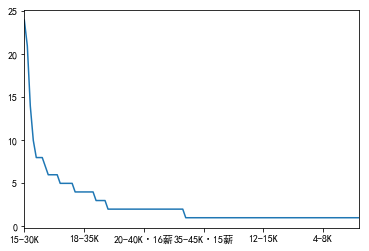

In [3]:
data['薪资'].value_counts().plot()

## 数据处理
* 重复值处理
* 表头处理
* 薪资处理:上下限，平均值


### 重复值处理

In [4]:
#重复值查询
data.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

无重复值，如果有，可通过“drop_duplicates()”删除

### 表头处理

In [5]:
#将表头换成英文
data2 = data
colname = {"公司":'company',"职位名":'position','薪资':'salary','地址':'address','工作经验':'workExp','学历要求':'Education','公司行业':'Field','公司发展阶段':'stage','公司规模':'Companysize','招聘地址':'html'}
data2.rename(columns = colname,inplace=True)
data2.head()

,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接
0,京东世纪贸易有限公司,数据分析,15-20K·14薪,北京 大兴区 次渠,3-5年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/af6c91fc7c3e444d...
1,Boss直聘,数据分析师,8-13K,北京 朝阳区 太阳宫,5-10年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...
2,朴新网校,数据分析师,16-24K,北京 海淀区 苏州街,经验不限,本科,在线教育,已上市,10000人以上,https://www.zhipin.com/gongsi/77b8a6b14f46879c...
3,好未来,投放数据分析经理,20-40K·14薪,北京 海淀区 中关村,5-10年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...
4,京东集团,数据分析岗,10-15K,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...


### 薪资处理

In [6]:
#薪资处理
def cut_word(word,method):
    position = word.find('-') #找出“-”所在的位置
    #切出薪资下限的数字字段,注意切分的位置
    bottomSalary = word[:position]
    #上限遇到K停止切
    topSalary = word[position+1:word.find('K')]
    
    if method == 'bottom':
        return bottomSalary
    else:
        return topSalary
#打印salary字段前5行查看
data2.salary.apply(cut_word,method = 'top').head()

0    20
1    13
2    24
3    40
4    15
Name: salary, dtype: object

In [7]:
#插入表格新的列，薪资上下限两列
data2['bottomSalary'] = data2.salary.apply(cut_word,method='bottom')
data2['topSalary'] = data2.salary.apply(cut_word,method='top')

data2.head()

,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接,bottomSalary,topSalary
0,京东世纪贸易有限公司,数据分析,15-20K·14薪,北京 大兴区 次渠,3-5年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/af6c91fc7c3e444d...,15,20
1,Boss直聘,数据分析师,8-13K,北京 朝阳区 太阳宫,5-10年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,8,13
2,朴新网校,数据分析师,16-24K,北京 海淀区 苏州街,经验不限,本科,在线教育,已上市,10000人以上,https://www.zhipin.com/gongsi/77b8a6b14f46879c...,16,24
3,好未来,投放数据分析经理,20-40K·14薪,北京 海淀区 中关村,5-10年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...,20,40
4,京东集团,数据分析岗,10-15K,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...,10,15


In [8]:
#从上面的数据看起来，好像是对，那么接下来，
    #转换类型，将工资原object转换成int
    #计算平均工资
data2.bottomSalary = data2.bottomSalary.astype('int')
data2.topSalary = data2.topSalary.astype('int')
#data['avgSalary'] = data.apply(lambda x:(x.bottomSalary + x.topSalary)/2,axis=1)
data2.head()

ValueError: invalid literal for int() with base 10: '200/'

In [15]:
#有错误，这里是因为“200/”这样的字符型数据无法强制转换，
#要么是切分有问题，要么是数据本身有问题，还好数据少，先人工看看
#显示所有列
data2.head(500)

,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接,bottomSalary,topSalary
0,京东世纪贸易有限公司,数据分析,15-20K·14薪,北京 大兴区 次渠,3-5年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/af6c91fc7c3e444d...,15,20
1,Boss直聘,数据分析师,8-13K,北京 朝阳区 太阳宫,5-10年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,8,13
2,朴新网校,数据分析师,16-24K,北京 海淀区 苏州街,经验不限,本科,在线教育,已上市,10000人以上,https://www.zhipin.com/gongsi/77b8a6b14f46879c...,16,24
3,好未来,投放数据分析经理,20-40K·14薪,北京 海淀区 中关村,5-10年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...,20,40
4,京东集团,数据分析岗,10-15K,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...,10,15
5,Boss直聘,数据分析师,15-25K,北京 朝阳区 太阳宫,1-3年,硕士,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,15,25
6,京东集团,数据分析师,14-28K·13薪,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...,14,28
7,京东集团,数据分析师,20-30K,北京,5-10年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...,20,30
8,Boss直聘,数据分析师,12-18K,北京 朝阳区 太阳宫,1-3年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,12,18
9,美菜网,数据分析高经/专家,20-40K,北京 朝阳区 安贞,5-10年,学历不限,移动互联网,D轮及以上,10000人以上,https://www.zhipin.com/gongsi/0cc0d8a3ac3a2544...,20,40


尽管数据少，还是看得眼睛快瞎，才找到了问题行，如下图。
从图中可以看出，类似这种实习岗，工资按天算的，不符合我们的统计要求，所以还是舍弃吧

![问题数据](问题数据-百度薪资条.png)

In [16]:
#先转成str字符串类型
data3 = data2.astype(str)

#找到数据含有200/的这一行
s4drop = data3[data['salary'].str.contains('/天')]
s4drop
#没想到还有好几条这样的数据,删除了！

,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接,bottomSalary,topSalary
74,好未来,数据分析实习生,150-200/天,北京 海淀区 中关村,4天/周,5个月,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...,150,200/
139,艾漫数据,数据分析实习生,150-200/天,北京 朝阳区 酒仙桥,4天/周,4个月,互联网,已上市,20-99人,https://www.zhipin.com/gongsi/36c741daa08c8072...,150,200/
156,百度,数据挖掘与数据分析,150-200/天,北京 海淀区 马连洼,4天/周,5个月,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/ab9fdc6f04367999...,150,200/
189,清研智库,数据分析实习生,100-150/天,北京 海淀区 大钟寺,4天/周,3个月,咨询,不需要融资,100-499人,https://www.zhipin.com/gongsi/aad0923949a9505e...,100,150/
225,IFRE,数据分析实习生,150-200/天,北京 东城区 北新桥,5天/周,12个月,互联网金融,20-99人,100-499人,https://www.zhipin.com/gongsi/366639cc8a85a8b8...,150,200/


In [17]:
#使用运算符简单解决
data4 = data3[~data["salary"].str.contains("/天")]
data4.describe()
#从数量上来看，比之前的300条少了5条，搞定。

,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接,bottomSalary,topSalary
count,295,295,295,295,295,295,295,295,295,295,295,295
unique,178,112,111,83,7,4,29,11,6,180,24,36
top,Boss直聘,数据分析师,15-30K,北京 朝阳区 望京,3-5年,本科,互联网,已上市,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,20,30
freq,17,117,24,24,111,234,69,73,84,17,54,44


In [18]:
#接着上面的求平均薪资
data4.bottomSalary = data4.bottomSalary.astype('int')
data4.topSalary = data4.topSalary.astype('int')
data4['avgSalary'] = data4.apply(lambda x:(x.bottomSalary + x.topSalary)/2,axis=1)
data4.head()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,company,position,salary,address,workExp,Education,Field,stage,Companysize,招聘链接,bottomSalary,topSalary,avgSalary
0,京东世纪贸易有限公司,数据分析,15-20K·14薪,北京 大兴区 次渠,3-5年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/af6c91fc7c3e444d...,15,20,17.5
1,Boss直聘,数据分析师,8-13K,北京 朝阳区 太阳宫,5-10年,本科,人力资源服务,D轮及以上,1000-9999人,https://www.zhipin.com/gongsi/fa2f92669c66eee3...,8,13,10.5
2,朴新网校,数据分析师,16-24K,北京 海淀区 苏州街,经验不限,本科,在线教育,已上市,10000人以上,https://www.zhipin.com/gongsi/77b8a6b14f46879c...,16,24,20.0
3,好未来,投放数据分析经理,20-40K·14薪,北京 海淀区 中关村,5-10年,本科,互联网,已上市,10000人以上,https://www.zhipin.com/gongsi/efa878c051261c74...,20,40,30.0
4,京东集团,数据分析岗,10-15K,北京 大兴区 次渠,3-5年,本科,电子商务,已上市,10000人以上,https://www.zhipin.com/gongsi/33e052361693f837...,10,15,12.5


## 描述性统计

Text(0,0.5,'数量')

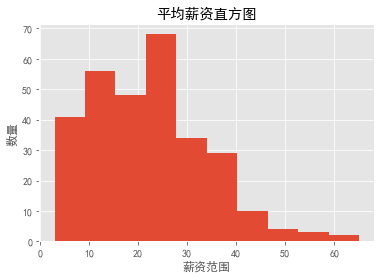

In [19]:
#平均工资直方图
plt.style.use('ggplot')
data4.avgSalary.hist(bins=10)
plt.title("平均薪资直方图")
plt.xlabel("薪资范围")
plt.ylabel("数量")

从平均薪资的直方图可以看出，大部分的平均薪资都在30k以下,20-30k最多，可见薪资水平还是可以的

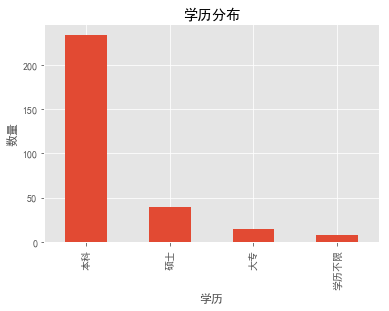

In [20]:
#学历影响
#首先，绘出总体从业的学历分布，
data4.Education.value_counts().plot(kind = 'bar')
plt.title("学历分布")
plt.xlabel("学历")
plt.ylabel('数量')
#一个cell画多张图，需要给前面的图加show（）
plt.show()


从学历分布上来看，从事数据分析的大多数要求本科及以上，对于学历要求还是挺高的
此外，由于数据较少，缺少更高学历的样本
接下来，看看学历是不是和平均薪资成正比

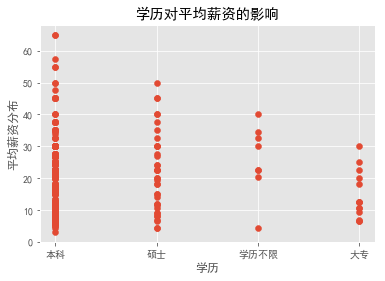

In [21]:
plt.scatter(data4.Education,data4.avgSalary)
plt.title('学历对平均薪资的影响')
plt.xlabel('学历')
plt.ylabel('平均薪资分布')
plt.show()

从散点图，对比本科和硕士，可以大概看出，硕士的起薪要稍微高于本科，
但是奇怪的是本科的最高值比硕士还高，可能是因为工作经验上的加分吧，
经验对于数据分析岗位来说很重要。

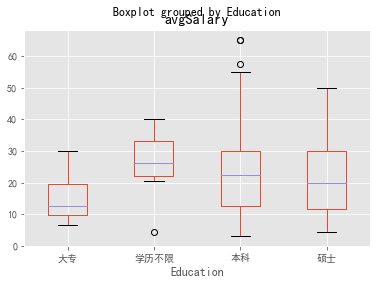

In [22]:
#为了看得更清楚点，继续用箱图画出
data4.boxplot(column='avgSalary',by='Education')